In [3]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from keras.datasets import mnist
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import random as rand

silhouette average for k = 2 : 0.9796674241938274
silhouette average for k = 3 : 0.6990439504428412
silhouette average for k = 4 : 0.7170802277739126
silhouette average for k = 5 : 0.5991707180459457
silhouette average for k = 6 : 0.5582642180451429
silhouette average for k = 7 : 0.595130682781176
silhouette average for k = 8 : 0.5445498241481622
silhouette average for k = 9 : 0.5372718424193594
silhouette average for k = 10 : 0.48669098378634573
silhouette average for k = 11 : 0.4889275398208519
silhouette average for k = 12 : 0.30122247600927793
silhouette average for k = 13 : 0.21166616332562974
silhouette average for k = 14 : 0.17617591212275388
silhouette average for k = 15 : 0.1933077027407197
silhouette average for k = 16 : 0.14719328160282233
silhouette average for k = 17 : 0.0931773943166134
silhouette average for k = 18 : 0.07491179833015843
silhouette average for k = 19 : 0.06581515775254443


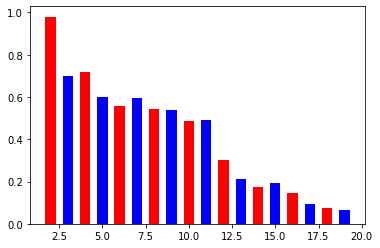

In [11]:
class_A = []
class_B = []
 
for i in range(10):
	class_A.append([1000+np.random.randint(1,120),1000+np.random.randint(1,120)])
	class_B.append([-1000+np.random.randint(1,120),-1000+np.random.randint(1,120)])

data_1 = np.vstack([class_A,class_B])
avg = []
kvals = []
# Prepare initial centers using K-Means++ method.
for k in range(2,20,1):
	initial_centers = kmeans_plusplus_initializer(data_1, k).initialize()
	kmeans_instance = kmeans(data_1, initial_centers)

	kmeans_instance.process()
	clusters = kmeans_instance.get_clusters()

	cluster_labels = [0 for i in range(20)]

	for i in range(k):
		for j in range(len(clusters[i])) :
			cluster_labels[clusters[i][j]] = i

	silhouette_avg = silhouette_score(data_1, cluster_labels)
	print('silhouette average for k =',k,':',silhouette_avg)
	avg.append(silhouette_avg)
	kvals.append(k)

	# final_centers = kmeans_instance.get_centers()

	# use this for 1D,2D or 3D clustering
	# Visualize obtained results
	# kmeans_visualizer.show_clusters(inp, clusters, final_centers)

plt.bar(kvals, avg, width = 0.6, color = ['red', 'blue'])
plt.show()